In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/uit-thpt-competition-2025/train.csv
/kaggle/input/uit-thpt-competition-2025/test.csv
/kaggle/input/student-stress-monitoring-datasets/StressLevelDataset.csv
/kaggle/input/student-stress-monitoring-datasets/Stress_Dataset.csv


In [2]:
# Read data
df = pd.read_csv("/kaggle/input/student-stress-monitoring-datasets/StressLevelDataset.csv")
df.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

X = df.drop(columns=["stress_level"])
y = df["stress_level"]

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(n_estimators=250)  # thử k=5 trước
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=250)

Accuracy: 0.8727272727272727

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86        76
           1       0.91      0.86      0.89        73
           2       0.87      0.87      0.87        71

    accuracy                           0.87       220
   macro avg       0.87      0.87      0.87       220
weighted avg       0.87      0.87      0.87       220



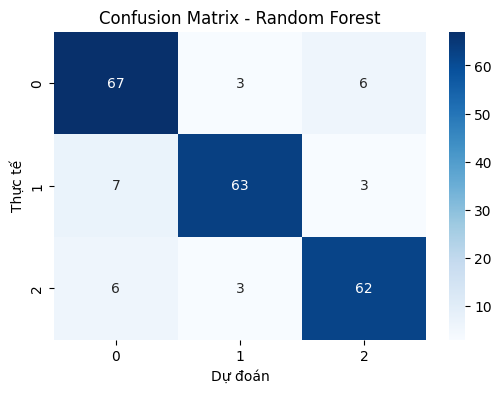

In [11]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = random_forest_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

# Không truyền target_names nữa
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix (dùng nhãn số 0,1,2 mặc định)
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Dự đoán")
plt.ylabel("Thực tế")
plt.title("Confusion Matrix - Random Forest")
plt.show()


In [12]:
import joblib
joblib.dump(random_forest_model, "random_forest_model.pkl")

['random_forest_model.pkl']